## Séries temporais estacionárias: prevsião pela média

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação do modelo de previsão pela média dos valores conhecidos.

Data da última atualização: 17/02/2025

#### Preliminares

In [1]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [3]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('HistoricoVendasPadaria.csv', index_col = 0)

In [4]:
# Exibição do DataFrame

MinhaSerieTemporal

,Vendas
Data,
2024-02-04,52
2024-02-05,20
2024-02-06,34
2024-02-07,31
2024-02-08,36
...,...
2025-01-28,31
2025-01-29,31
2025-01-30,41


In [5]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Data'>

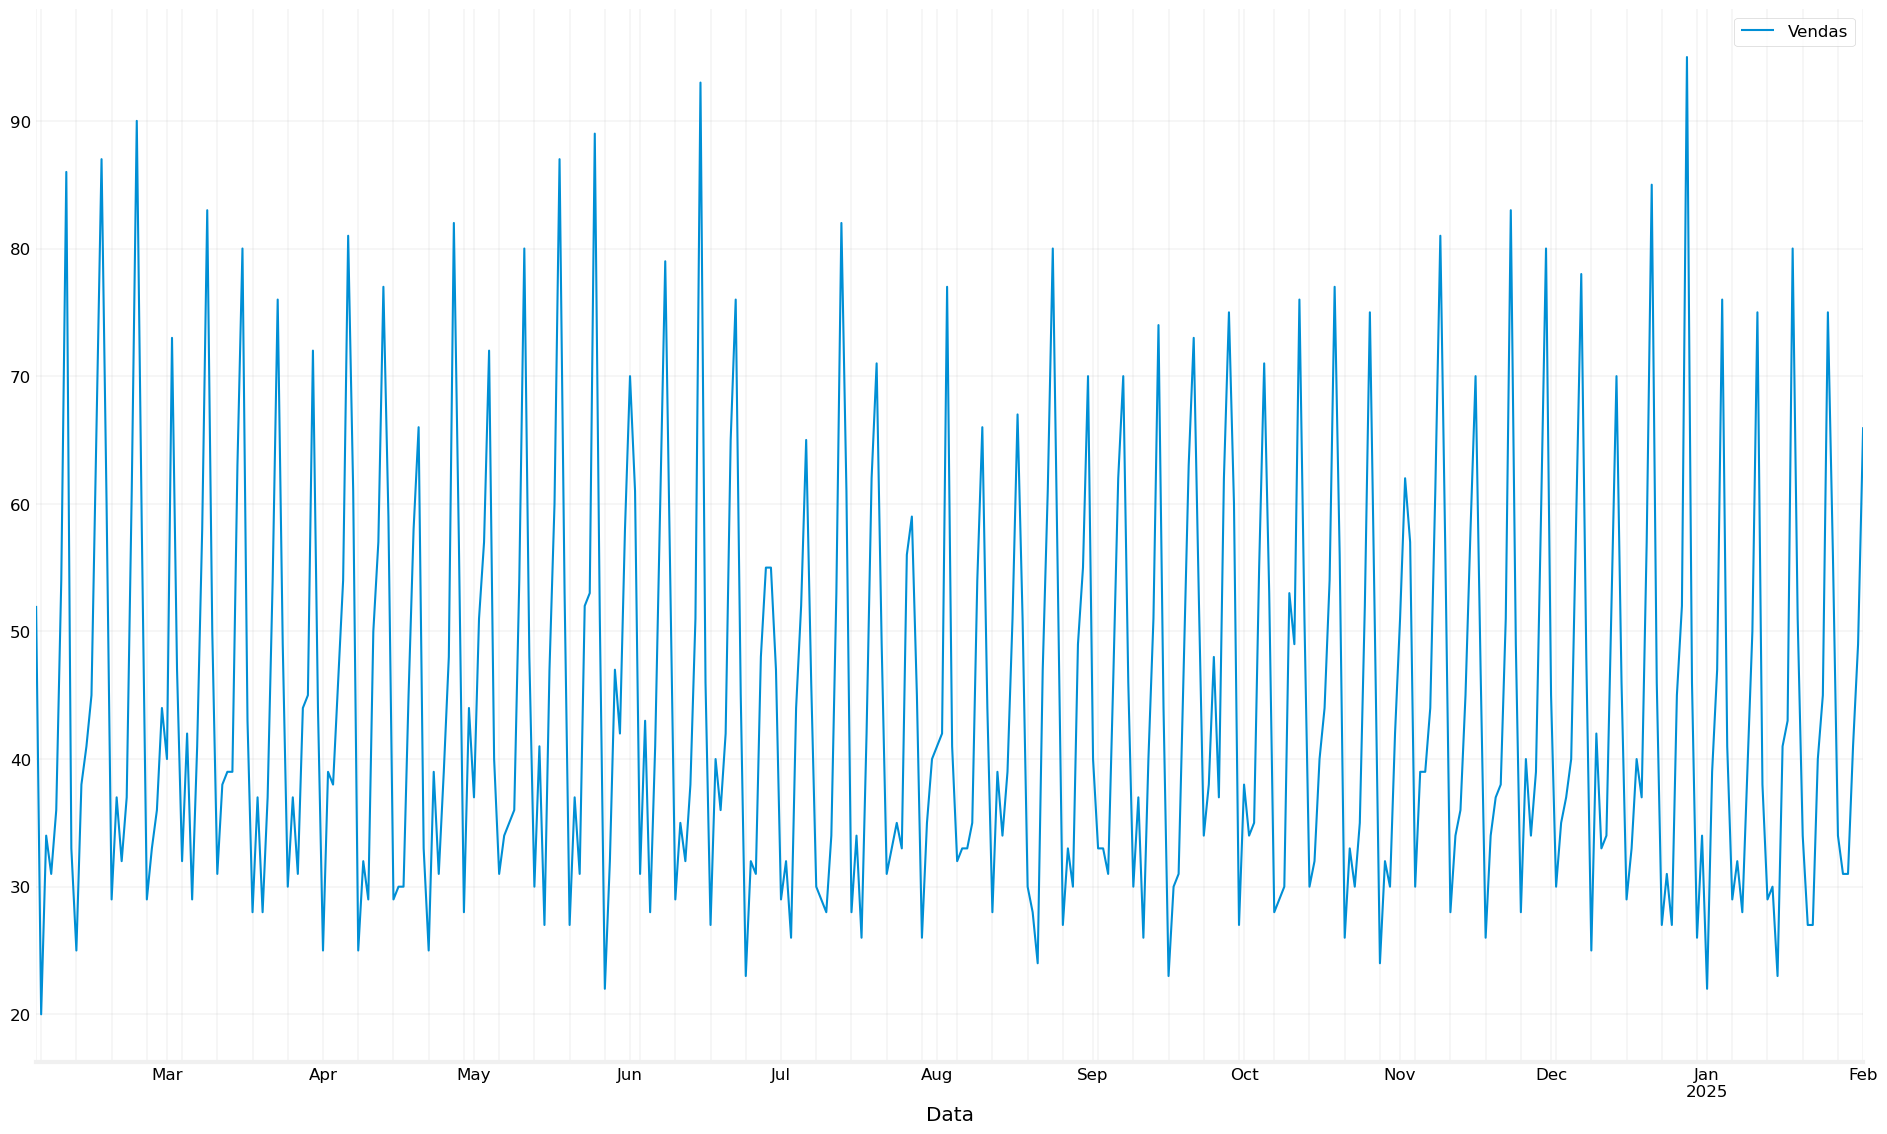

In [6]:
# Gráfico
MinhaSerieTemporal.plot()

In [7]:
# Separação das vendas por dia da semana
DiaDaSemana = ['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado']
VendasPorDiaDaSemana = pd.concat([MinhaSerieTemporal[k::7].rename(columns = {'Vendas':DiaDaSemana[k]}) for k in range(7)], axis = 1)

VendasPorDiaDaSemana

,Domingo,Segunda,Terça,Quarta,Quinta,Sexta,Sábado
Data,,,,,,,
2024-02-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-05,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2024-02-06,NaN,NaN,34.0,NaN,NaN,NaN,NaN
2024-02-07,NaN,NaN,NaN,31.0,NaN,NaN,NaN
2024-02-08,NaN,NaN,NaN,NaN,36.0,NaN,NaN
...,...,...,...,...,...,...,...
2025-01-28,NaN,NaN,31.0,NaN,NaN,NaN,NaN
2025-01-29,NaN,NaN,NaN,31.0,NaN,NaN,NaN
2025-01-30,NaN,NaN,NaN,NaN,41.0,NaN,NaN


In [8]:
VendasPorDiaDaSemana.describe().round(1)

,Domingo,Segunda,Terça,Quarta,Quinta,Sexta,Sábado
count,52.0,52.0,52.0,52.0,52.0,52.0,52.0
mean,49.2,28.2,34.9,32.5,41.6,54.6,76.1
std,6.9,3.0,4.1,5.5,4.9,5.9,8.2
min,33.0,20.0,27.0,22.0,33.0,40.0,55.0
25%,45.0,26.0,32.0,28.8,38.0,51.0,70.8
50%,49.0,28.5,34.0,31.0,41.0,54.0,76.0
75%,54.0,30.0,38.0,36.0,45.0,59.0,81.0
max,61.0,34.0,44.0,48.0,53.0,66.0,95.0


#### Decomposição da Série

In [9]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 7     # Sazonalidade semanal

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

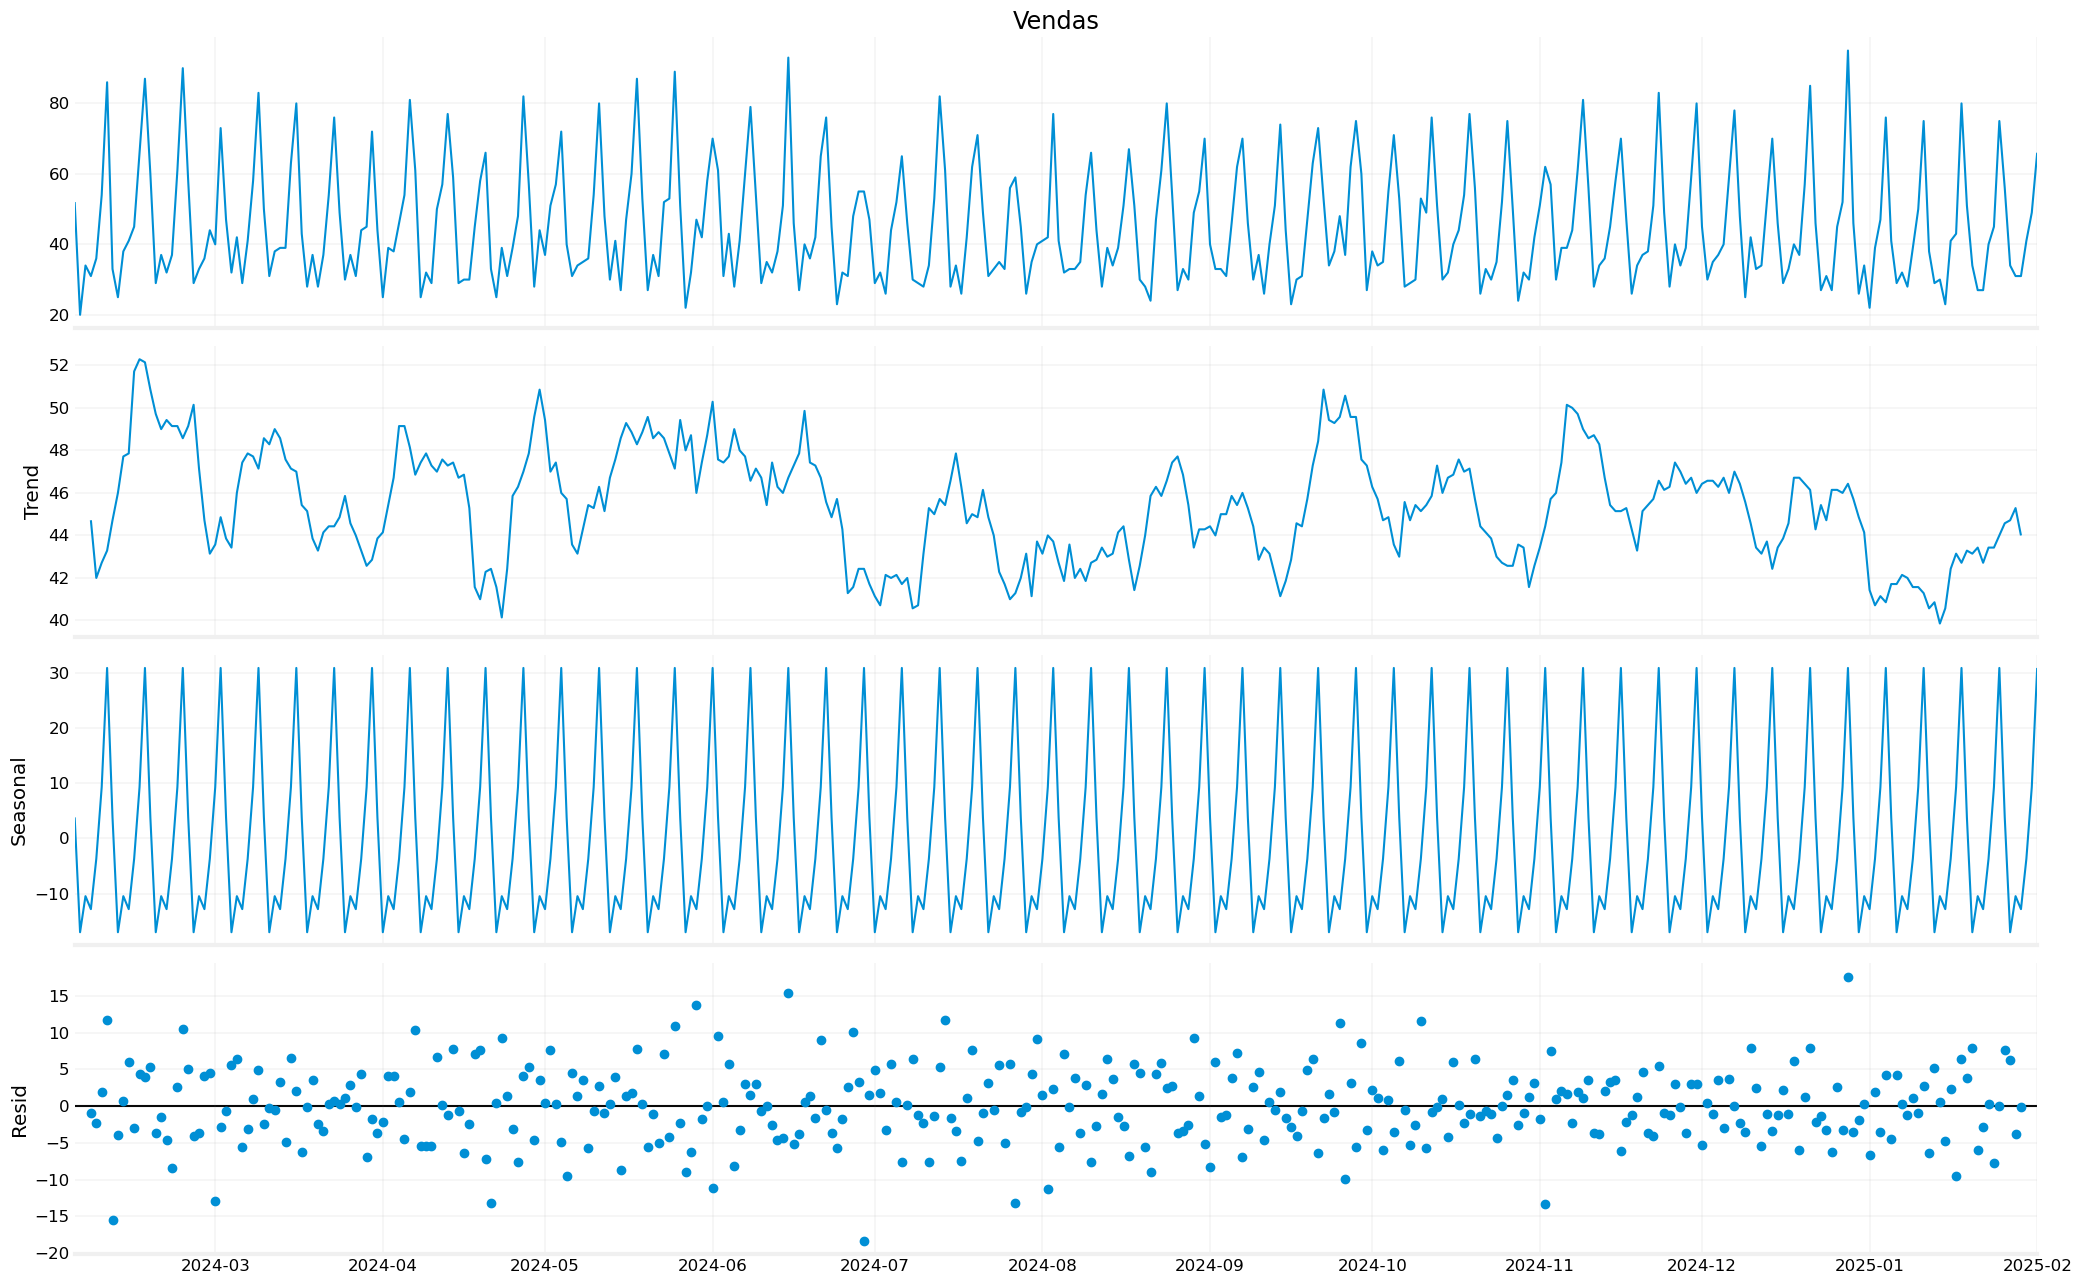

In [10]:
Decomposicao.plot();

#### Teste ADF

In [11]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -4.1514
p-value:          0.0795 %


In [12]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 1

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -9.9963
p-value:          0.0000 %


#### Funcão de autocorrelação

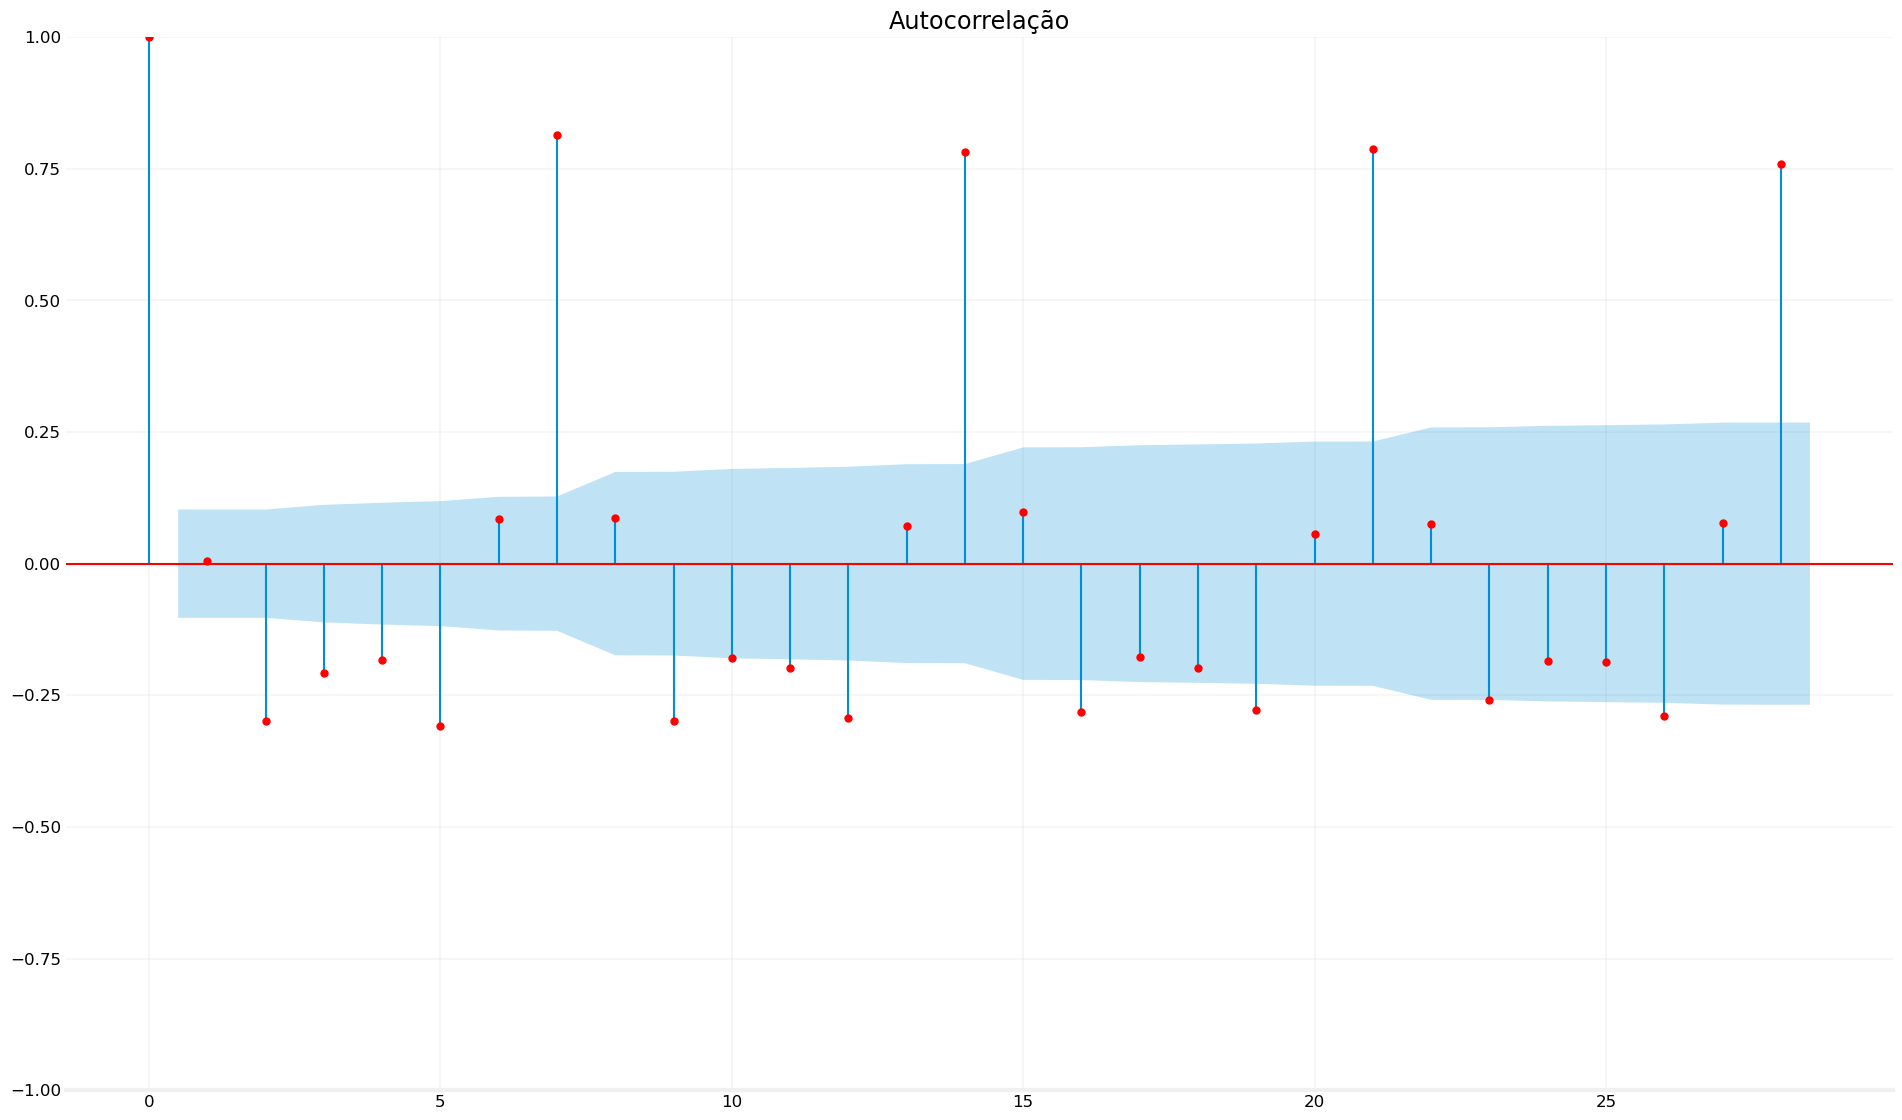

In [13]:
# Função de correlação para série temporal

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

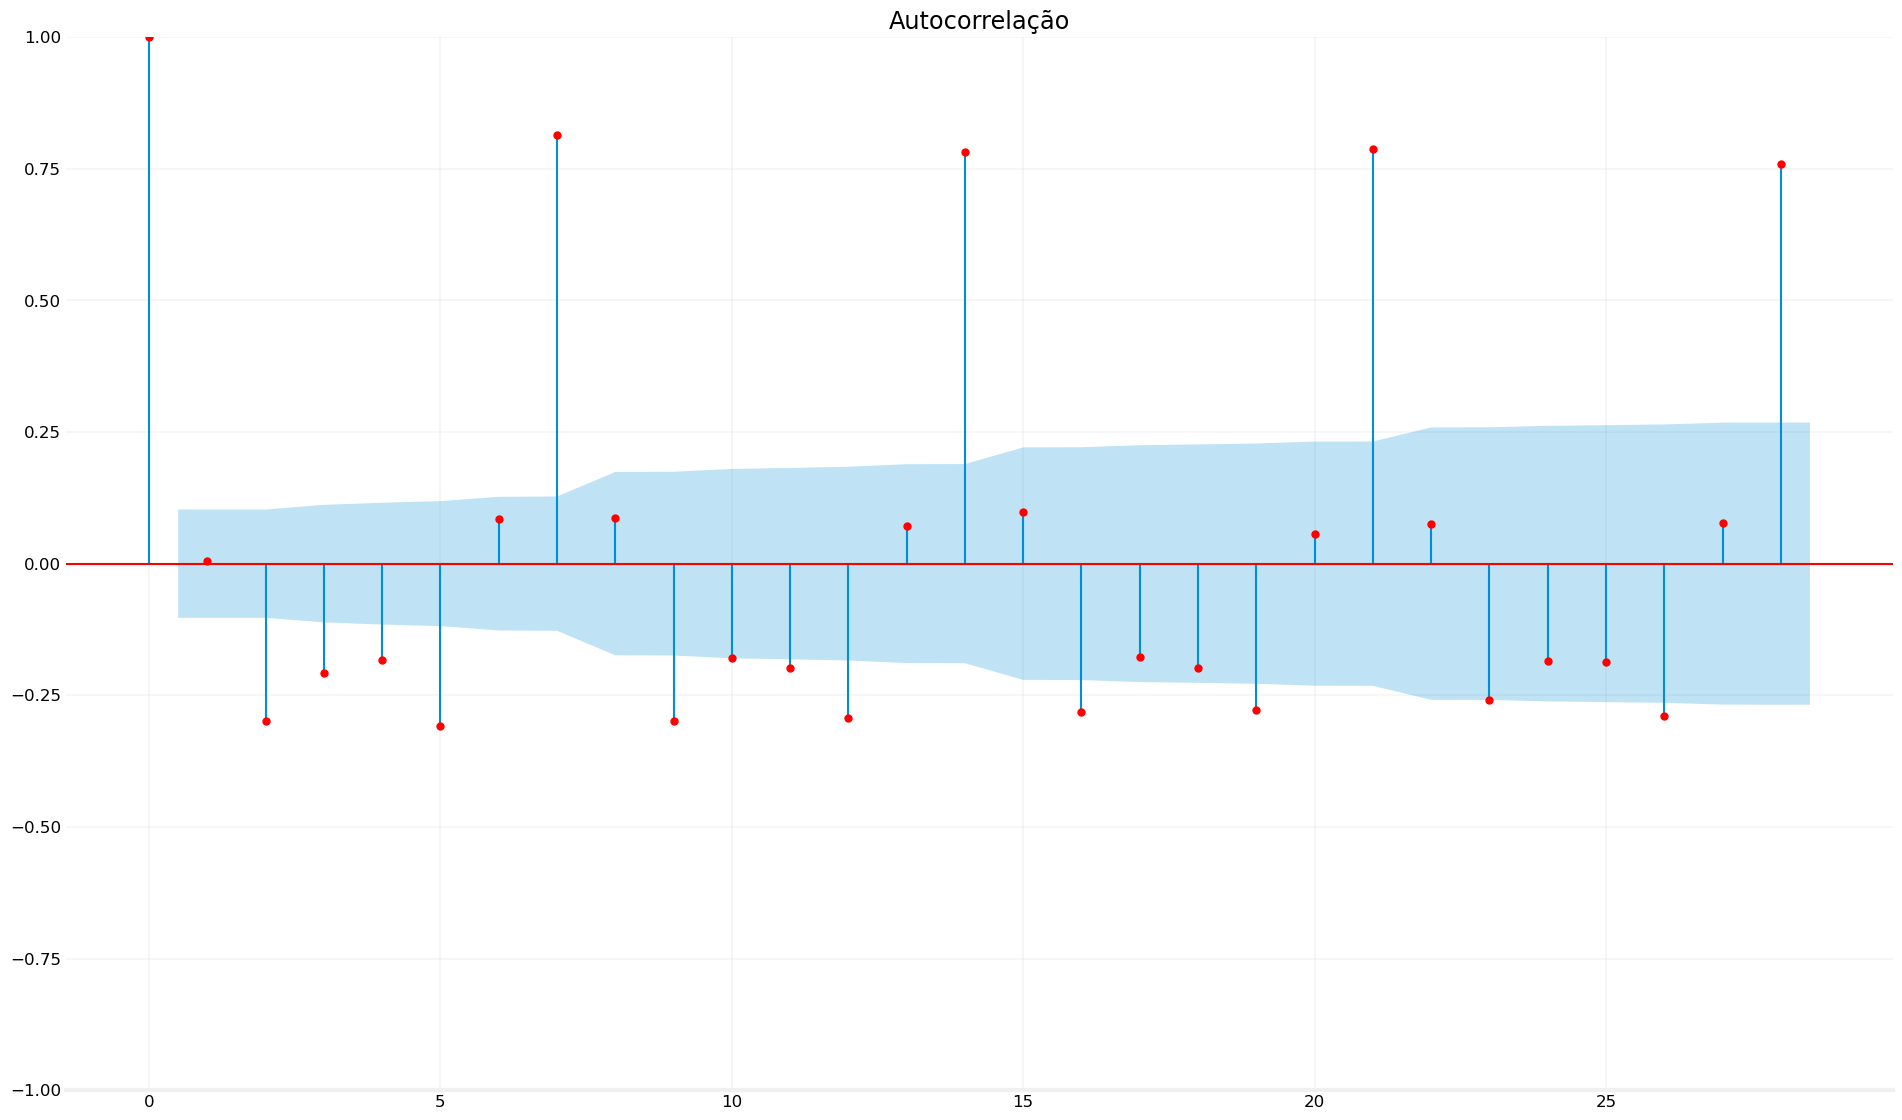

In [14]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [15]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [16]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Data'>

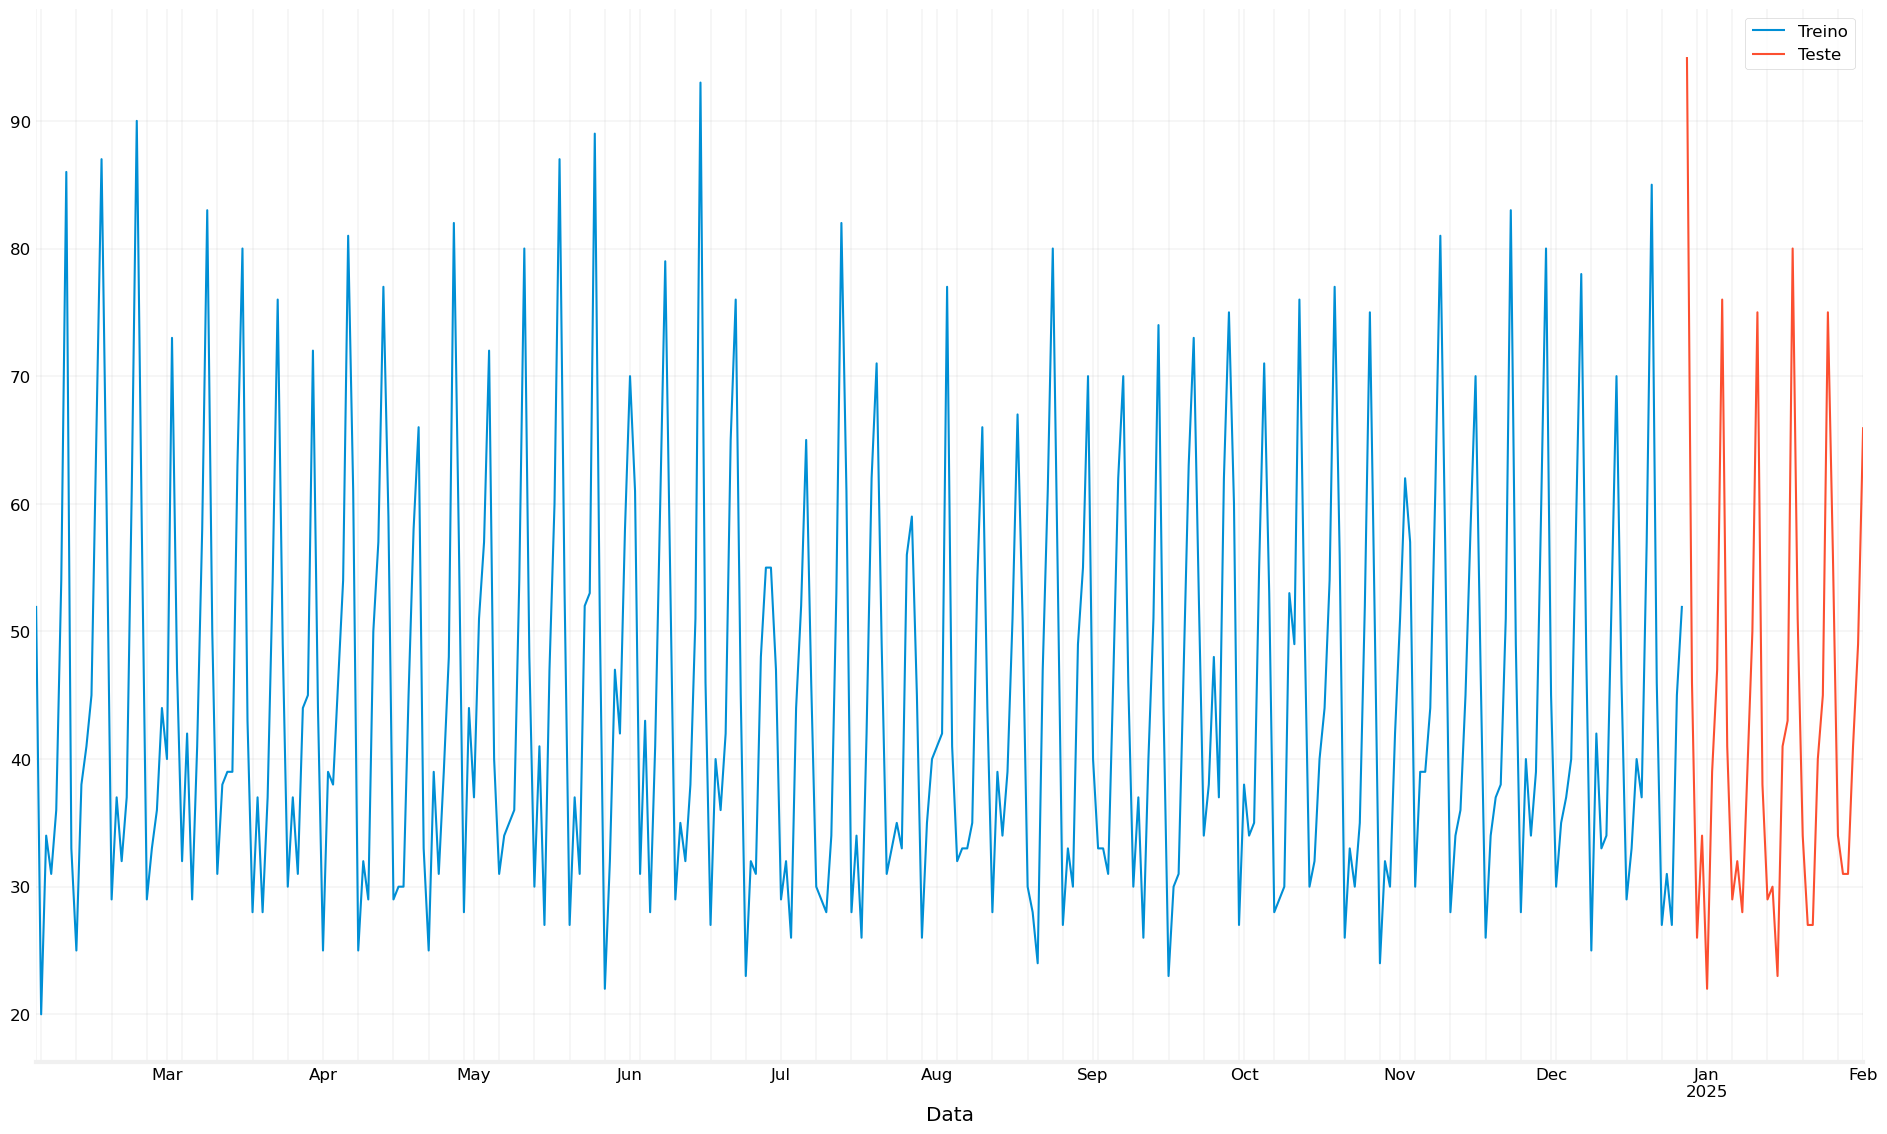

In [17]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pela média

In [18]:
# Cálculo da média dos valores da série temporal na base de treino 

MediaTreino = TreinoDF['Treino'].mean()

In [19]:
DiaDaSemanaPD = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

In [20]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = [VendasPorDiaDaSemana[DiaDaSemanaPD[dia.weekday()]][:-PeriodoTeste].mean() for dia in MinhaSerieTemporal[-PeriodoTeste:].index]

<Axes: xlabel='Data'>

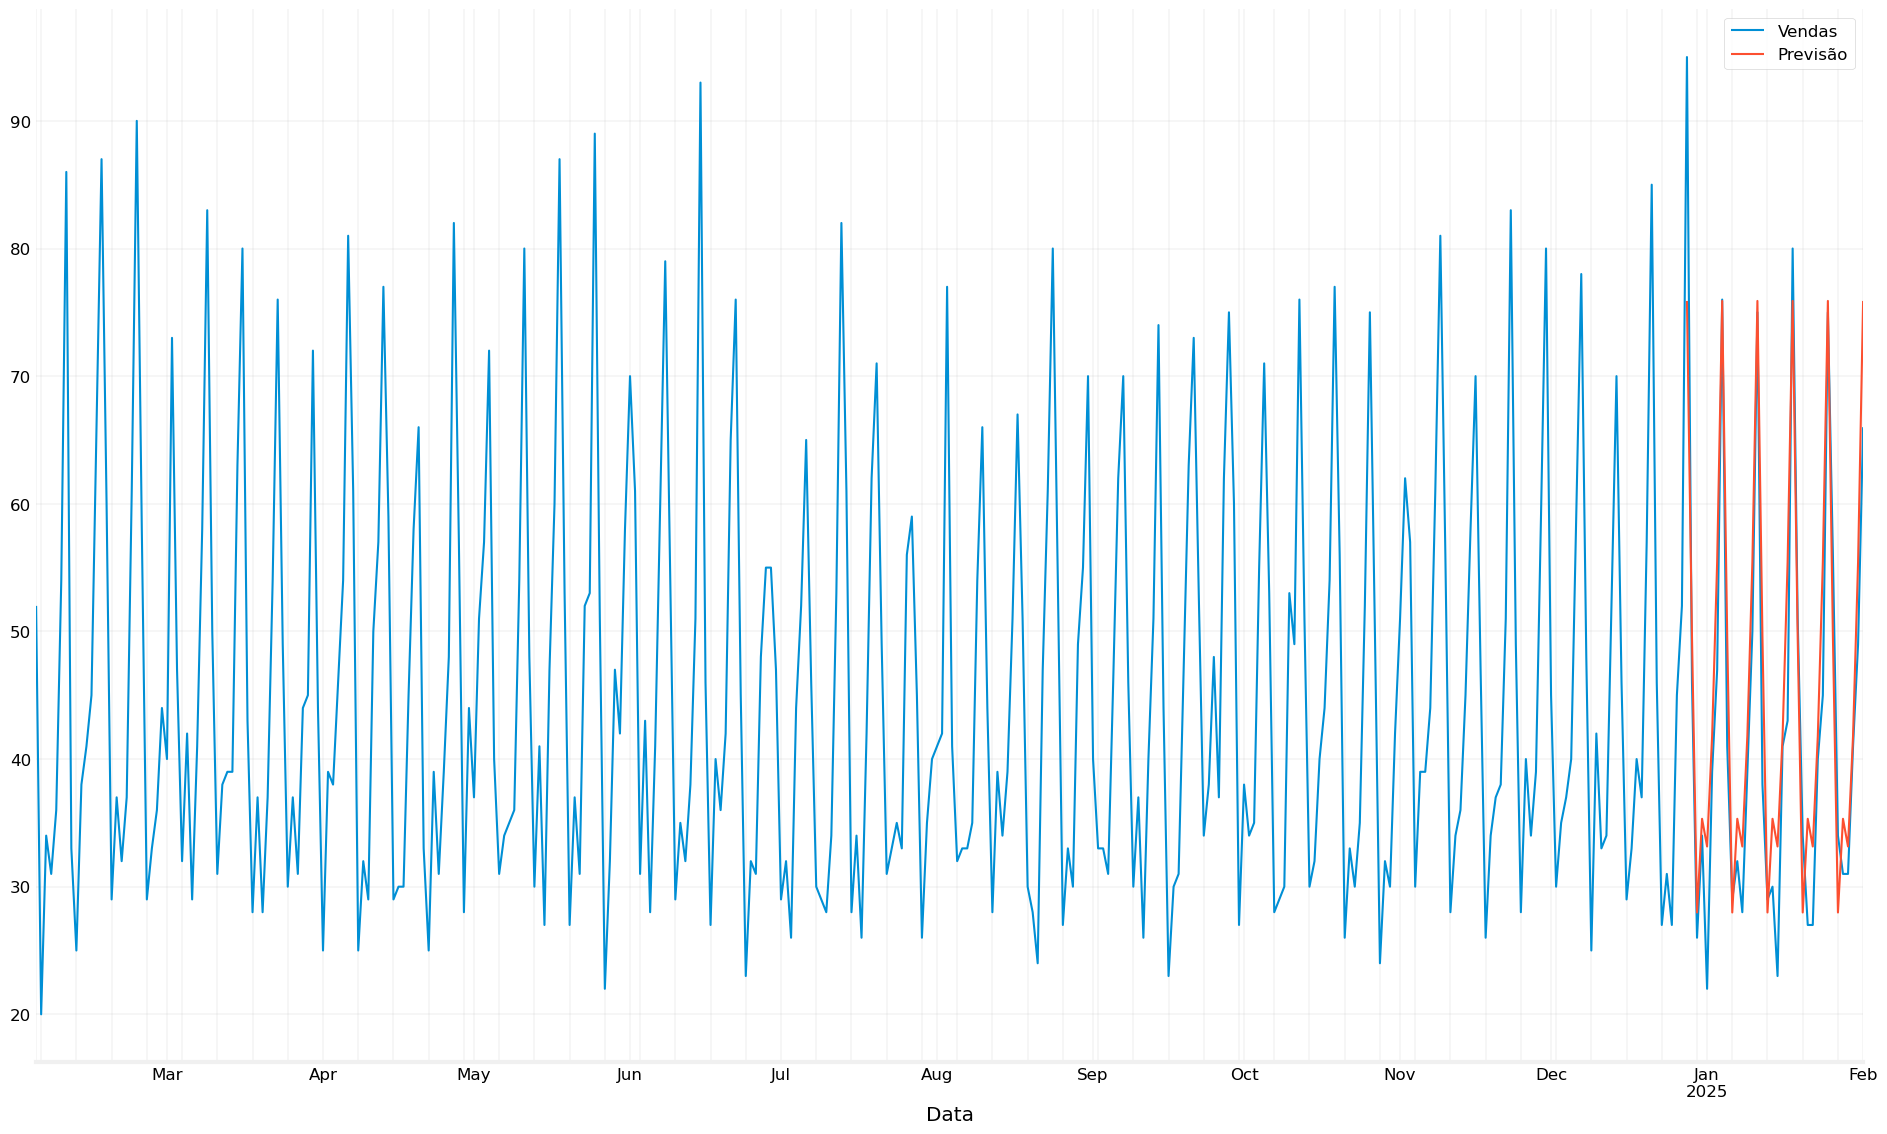

In [21]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [22]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([-19.10869565,   3.55319149,   1.9787234 ,   1.31914894,
        11.14893617,   2.80851064,   8.42553191,  -0.10869565,
         8.55319149,  -1.0212766 ,   3.31914894,   5.14893617,
         2.80851064,   5.42553191,   0.89130435,  11.55319149,
        -1.0212766 ,   5.31914894,  10.14893617,   0.80851064,
        12.42553191,  -4.10869565,  -1.44680851,  -6.0212766 ,
         8.31914894,   6.14893617,   1.80851064,  10.42553191,
         0.89130435,  -6.44680851,  -6.0212766 ,   4.31914894,
         2.14893617,   0.80851064,   6.42553191,   9.89130435])

In [23]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [24]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [25]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [26]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([-0.20114416,  0.07724329,  0.07610475,  0.0387985 ,  0.50676983,
        0.07201309,  0.17926664, -0.00143021,  0.20861443, -0.03521643,
        0.1037234 ,  0.18389058,  0.07201309,  0.10851064,  0.01188406,
        0.30403135, -0.03521643,  0.17730496,  0.44125809,  0.01971977,
        0.28896586, -0.0513587 , -0.02836879, -0.17709637,  0.30811663,
        0.22773838,  0.04521277,  0.23167849,  0.01188406, -0.11512158,
       -0.17709637,  0.13932739,  0.06932052,  0.01971977,  0.1311333 ,
        0.14986825])

In [27]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [28]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: média por dia da semana')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: média por dia da semana

Erro médio:  2.8
MAE:         5.3
RMSE:        6.8
MAPE:        14.0 %
